In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

# Convección Lineal en 2D

La ecuación que describe la convección 2D es
$$ \frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x}+c \frac{\partial u}{\partial y}+=0$$

Cuya solución es simplemente $u(x,y,t)=f(x-ct)+g(y-ct)$. Si se imponen condiciones iniciales $u(x,y,0)=u_0(x,y)$, entonces la solución en el tiempo es la propagación de la condicion inicial, $\textit{i.e.}$ $u(x,y,t)=u_0(x-ct,y-ct)$

Utilizando el método de diferencias finitas podemos discretizar el espacio y tiempo, y la función u y sus derivadas.

Podemos aproximar las derivadas de u como:
$$\frac{\partial u}{\partial t}(x,y,t) \approx \frac{u_{(i,j)}^{n+1}-u_{(i,j)}^n}{\Delta t}$$
$$\frac{\partial u}{\partial x}(x,y,t) \approx \frac{u_{(i,j)}^n-u_{(i-1,j)}^n}{\Delta x}$$
$$\frac{\partial u}{\partial y}(x,y,t) \approx \frac{u_{(i,j)}^n-u_{(i,j-1)}^n}{\Delta y}$$


Sustituyendo la aproximación en nuestra ecuación diferencial obtenemos:

$$\frac{u_{(i,j)}^{n+1}-u_{(i,j)}^n}{\Delta t} + c\frac{u_{(i,j)}^n-u_{(i-1,j)}^n}{\Delta x}+ c\frac{u_{(i,j)}^n-u_{(i,j-1)}^n}{\Delta y} = 0$$

De donde podemos despejar el siguiente paso como
$$u_{(i,j)}^{n+1}=u_{(i,j)}^n - c\frac{\Delta t}{\Delta x}\left(u_{(i,j)}^n-u_{(i-1,j)}^n\right)- c\frac{\Delta t}{\Delta y}\left(u_{(i,j)}^n-u_{(i,j-1)}^n\right) $$

In [2]:
#Se importan las librerias necesarias
from numpy import *
from matplotlib.pyplot import *
from matplotlib import animation
from JSAnimation import IPython_display
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

A continuación ponemos las condiciones iniciales como una funcion escalon en 2D

$$
u_0(x) = 
    \begin{cases} 
    2 & : (x,y) \in (0.1,0.5)\times(0.1,0.5)\\
    1 & : (x,y)\ \text{en lo demás}
  \end{cases}
$$

Con condiciones de frontera:


$$u = 1\ \text{si } \begin{cases}
\begin{matrix}
x  \in\{0,\ 2\} \cr
y  \in\{0,\ 2\} \end{matrix}\end{cases}$$

In [3]:
def avance_en_tiempo(nt, nx, ny, dt, dx, dy, flag=False):
    c = 1.          #La velocidad de la propagacion
    #Este arreglo sirve para guardar temporalmente el valor de la funcion uç
    
    u = ones((ny,nx))
    u[int(.5/dy):int(1/dy+1),  int(.5/dx):int(1/dx+1)] = 2 

    un = ones((nx,ny))
    if flag: hist=[]
        
    for n in range(nt):
        #Se copia el valor de la funcion u en el arreglo un
        un = u.copy()
        if flag:hist.append(un)
        #Para cada punto en el espacio se calcula el valor de la funcion en el tiempo siguiente
        u[1:-1,1:-1] = un[1:-1,1:-1]-c*dt/dx*(un[1:-1,1:-1]-un[1:-1,0:-2])-c*dt/dy*(un[1:-1,1:-1]-un[0:-2,1:-1])
        
        u[0,:]=1
        u[-1,:]=1
        u[:,0]=1
        u[:,-1]=1
        
    if flag:
        return hist
    else:
        return u

Veamos la evolución temporal de la propagación de la condicióni inicial

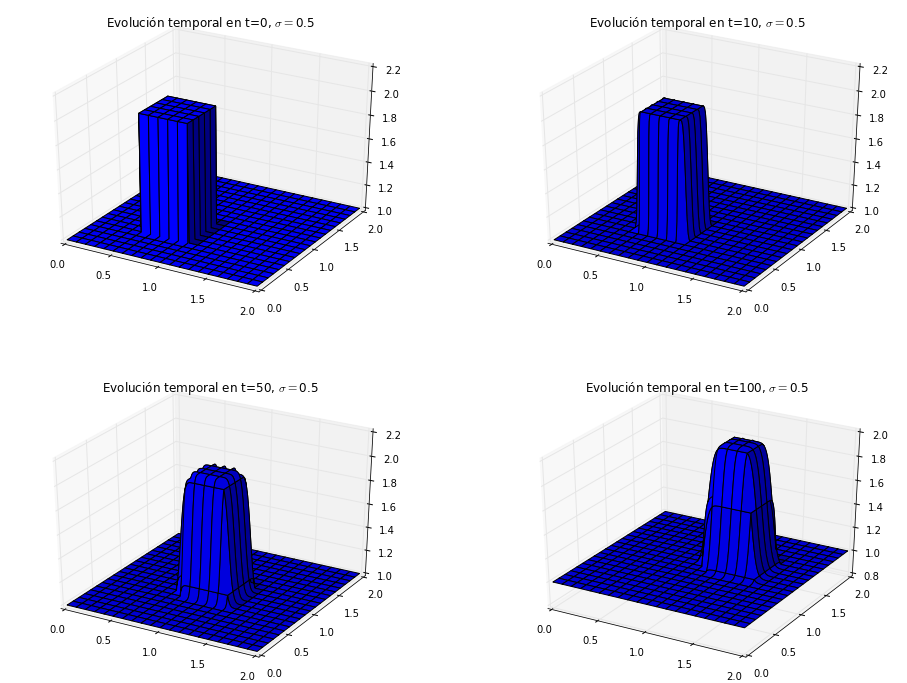

In [4]:
L = 2.

nx = 201
ny = 201
dx = 2./(nx-1)
dy = 2./(ny-1)
sigma = .5
dt = sigma*dx

x = linspace(0,L,nx)
y = linspace(0,L,ny)

                  
fig = figure(figsize=(16,12), dpi=100)
ax = fig.add_subplot(221, projection='3d')
bx = fig.add_subplot(222, projection='3d')
cx = fig.add_subplot(223, projection='3d')
ex = fig.add_subplot(224, projection='3d')
X, Y = meshgrid(x,y)  
u = ones((ny,nx))
u[int(.5/dy):int(1/dy+1),  int(.5/dx):int(1/dx+1)] = 2 

ax.plot_surface(X, Y, u[:])

U10 = avance_en_tiempo(10, nx, ny, dt, dx, dy)
bx.plot_surface(X, Y, U10[:])
U50 = avance_en_tiempo( 50, nx, ny, dt, dx, dy)
cx.plot_surface(X, Y, U50[:])
U100 = avance_en_tiempo(100, nx, ny, dt, dx, dy)
ex.plot_surface(X, Y, U100[:])

ax.set_title(u"Evolución temporal en t=0, $\sigma = $"+str(sigma))
bx.set_title(u"Evolución temporal en t=10, $\sigma = $"+str(sigma))
cx.set_title(u"Evolución temporal en t=50, $\sigma = $"+str(sigma))
ex.set_title(u"Evolución temporal en t=100, $\sigma = $"+str(sigma))

TypeError: 'Poly3DCollection' object is not iterable

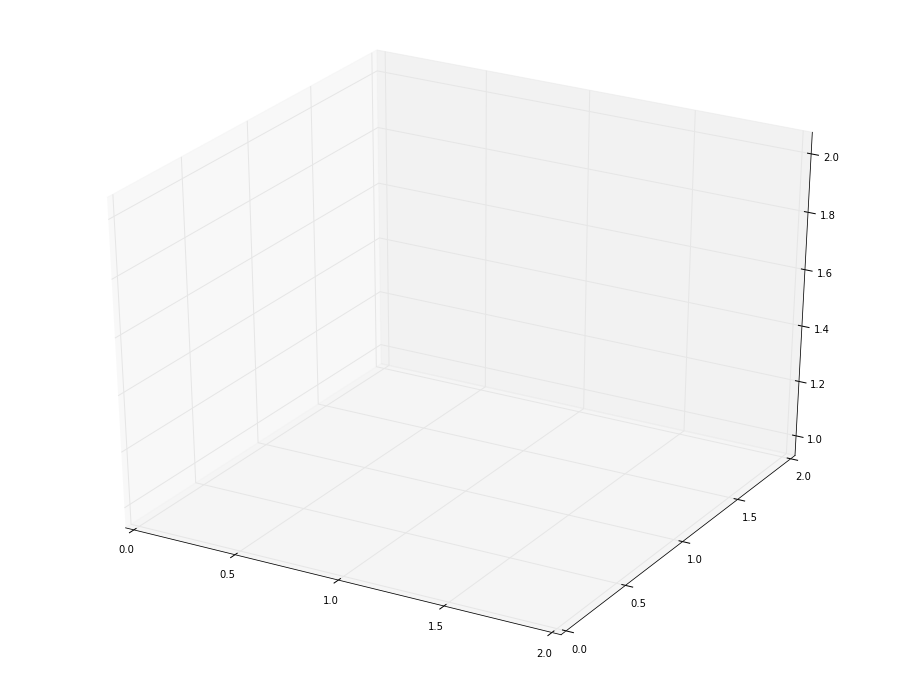

In [19]:
L = 2.

nx1 = 71
ny1 = 71
dx1 = L/(nx1-1)
dy1 = L/(ny1-1)

nx2 = 201
ny2 = 201
dx2 = L/(nx2-1)
dy2 = L/(ny2-1)

sigma = .5
dt1 = sigma*dx1
dt2 = sigma*dx2
 
u1 = ones((ny1, nx1))
u1[int(.5/dy1):int(1/dy1+1),  int(.5/dx1):int(1/dx1+1)] = 2 

u2 = ones((ny2, nx2))
u2[int(.5/dy2):int(1/dy2+1),  int(.5/dx2):int(1/dx2+1)] = 2 

u1_sol = avance_en_tiempo(100, nx1, ny1, dt1, dx1, dy1, True)
u2_sol = avance_en_tiempo(100, nx2, ny2, dt2, dx2, dy2, True)

# Se define el ambiente en el que queremos hacer la animación
fig = figure(figsize=(16,12), dpi=100)
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim3d(0,L)
ax.set_ylim3d(0,L)
ax.set_zlim3d(0.95,2.05)

linea1, = ax.plot_surface([], [], [], lw=2)
linea2, = ax.plot_surface([], [], [], lw=2)
T = 50 # periodo para generar T cuadros

# Funcion para inicializar cada cuadro de la animacion
def init():
    linea1.set_data([], [], [])
    linea2.set_data([], [], [])
    return linea1,linea2

# Esta funcion se llama de manera secuencial para cada elemento i.
def animate(i):
    x1 = linspace(0, L, nx1)
    x2 = linspace(0, L, nx2)
    
    y1 = linspace(0, L, ny1)
    y2 = linspace(0, L, ny2)
    
    z1 = u1_sol[i]
    z2 = u2_sol[i]
    
    linea1.set_data(x1, y1, z1),linea2.set_data(x2, y2, z2),
    return linea1,linea2,

# Se llama a la animacion.  blit=True es para que solo se dibije las partes de la imagen que tienen cambios.
animation.FuncAnimation(fig, animate, init_func=init, frames=2*T, interval=20)

Ahora veamos como afecta el factor $\sigma$ en la forma de la propagación.

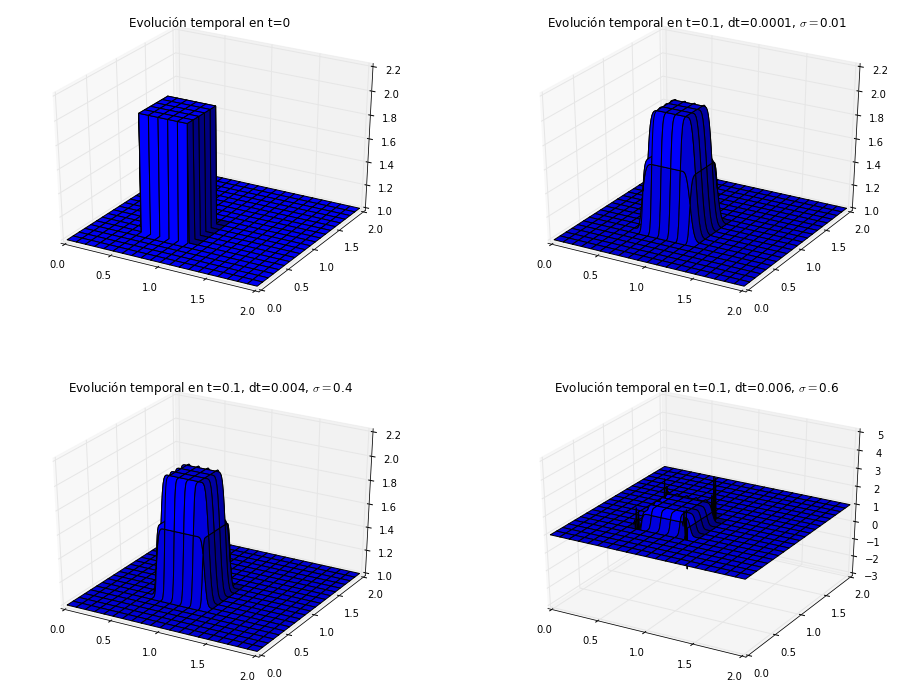

In [5]:
L = 2.

nx = 201
ny = 201
dx = 2./(nx-1)
dy = 2./(ny-1)
sigma2 = .01
sigma3 = .4
sigma4 = .6
dt2 = sigma2*min(dx,dy)
dt3 = sigma3*min(dx,dy)
dt4 = sigma4*min(dx,dy)

x = linspace(0,L,nx)
y = linspace(0,L,ny)

                  
fig = figure(figsize=(16,12), dpi=100)
ax = fig.add_subplot(221, projection='3d')
bx = fig.add_subplot(222, projection='3d')
cx = fig.add_subplot(223, projection='3d')
ex = fig.add_subplot(224, projection='3d')
X, Y = meshgrid(x,y)  

u = ones((ny,nx))
u[int(.5/dy):int(1/dy+1),  int(.5/dx):int(1/dx+1)] = 2 

ax.plot_surface(X, Y, u[:])

nt = 1000

U10 = avance_en_tiempo(nt, nx, ny, dt2, dx, dy)
bx.plot_surface(X, Y, U10[:])
U50 = avance_en_tiempo(int(nt*dt2/dt3), nx, ny, dt3, dx, dy)
cx.plot_surface(X, Y, U50[:])
U100 = avance_en_tiempo(int(nt*dt2/dt4), nx, ny, dt4, dx, dy)
ex.plot_surface(X, Y, U100[:])

ax.set_title(u"Evolución temporal en t=0")
bx.set_title(u"Evolución temporal en t="+str(nt*dt2)+", dt="+str(dt2)+", $\sigma = $"+str(sigma2))
cx.set_title(u"Evolución temporal en t="+str(nt*dt2)+", dt="+str(dt3)+", $\sigma = $"+str(sigma3))
ex.set_title(u"Evolución temporal en t="+str(nt*dt2)+", dt="+str(dt4)+", $\sigma = $"+str(sigma4))